# Libraries

In [8]:
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Statistical data visualization

# For machine learning and predictive modeling
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardizing features
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor  # Random forest regressor
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics


# For saving and loading trained models
#import joblib


In [9]:
# Read the cleaned and merged CSV file into a DataFrame
df5=pd.read_csv(r'C:\Users\DELL\3sem_project\stolenvechilesdf3(cleandata5_N_merged).csv')

In [10]:
df5

,no_plate,color,company_name,model_year,vehicle_type,date_stolen,district_name,No_Police_Areas,month,vehicle_age
0,PZQ399,SILVER,MAZDA,1999,CAR,2023-10-14,Bay of Plenty,4,October,25
1,LLF27,BLACK,MAZDA,2009,CAR,2023-10-15,Bay of Plenty,4,October,15
2,EJM12,SILVER,TOYOTA,1998,CAR,2023-10-16,Bay of Plenty,4,October,26
3,C4GUS,BLACK,FORZA,2021,MOTORCYCLE,2023-10-16,Bay of Plenty,4,October,3
4,343F2,WHITE,ELDDIS,2004,CAMPER,2023-10-16,Bay of Plenty,4,October,20
...,...,...,...,...,...,...,...,...,...,...
6305,LAS107,WHITE,HONDA,2017,CAR,2024-05-01,Tasman,3,May,7
6306,HNC464,BLUE,TOYOTA,1994,CAR,2024-05-02,Tasman,3,May,30
6307,JQD358,BLACK,HONDA,2005,CAR,2024-05-10,Tasman,3,May,19
6308,WR2755,BLUE,MITSUBISHI,1997,CAR,2024-05-10,Tasman,3,May,27


# Prediction Model:

# To forecast vehicle theft counts using these 3 model and evaluate the forecast accuracy and compare

In [11]:
#Option 1: SARIMA (Seasonal AutoRegressive Integrated Moving Average)

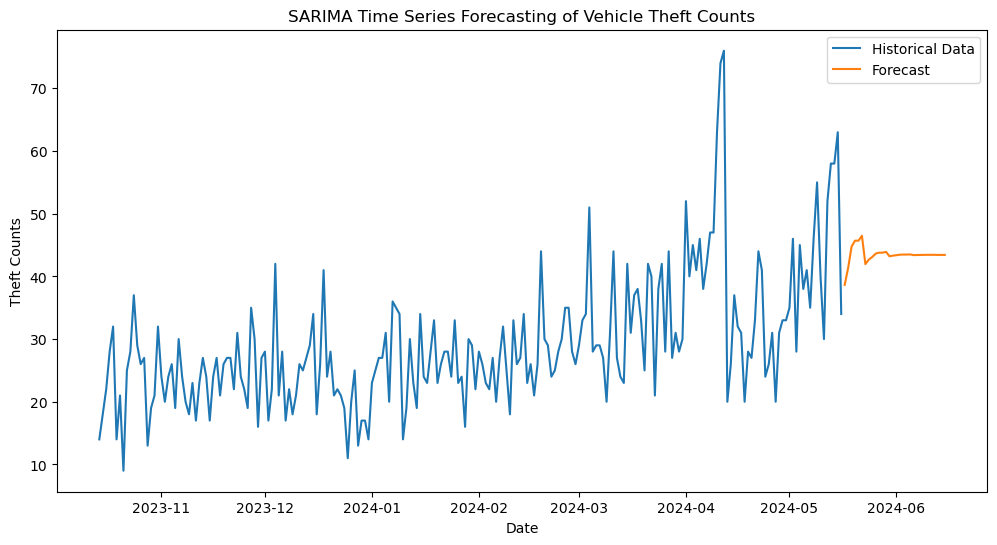

Forecasted Values: 2024-05-17    38.647725
2024-05-18    41.337711
2024-05-19    44.764737
2024-05-20    45.699381
2024-05-21    45.699381
2024-05-22    46.478250
2024-05-23    41.960807
2024-05-24    42.684801
2024-05-25    43.103831
2024-05-26    43.637672
2024-05-27    43.783265
2024-05-28    43.783265
2024-05-29    43.904593
2024-05-30    43.200893
2024-05-31    43.313672
2024-06-01    43.378946
2024-06-02    43.462105
2024-06-03    43.484784
2024-06-04    43.484784
2024-06-05    43.503684
2024-06-06    43.394066
2024-06-07    43.411634
2024-06-08    43.421802
2024-06-09    43.434756
2024-06-10    43.438289
2024-06-11    43.438289
2024-06-12    43.441233
2024-06-13    43.424157
2024-06-14    43.426894
2024-06-15    43.428478
Freq: D, Name: predicted_mean, dtype: float64
Ljung-Box Test:
Statistics: 1     0.008498
2     0.715689
3     0.927221
4     1.033564
5     1.427858
6     2.353308
7     2.592003
8     3.094134
9     3.460203
10    3.618322
Name: lb_stat, dtype: float64
P-value

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset and convert 'date_stolen' column to datetime
df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])

# Aggregate data by date
theft_counts_by_date = df5.resample('D', on='date_stolen').size()

# Perform auto SARIMA to find the best parameters
auto_sarima_model = auto_arima(theft_counts_by_date, seasonal=True, m=7)  # Weekly seasonal pattern

# Fit SARIMA model
sarima_model = SARIMAX(theft_counts_by_date, order=auto_sarima_model.order, seasonal_order=auto_sarima_model.seasonal_order)
sarima_result = sarima_model.fit()

# Get the residuals
residuals = sarima_result.resid

# Forecast future theft counts
forecast_steps = 30  # Forecast for 30 days (next month)
forecast = sarima_result.forecast(steps=forecast_steps)

# Visual Inspection of Forecasts
plt.figure(figsize=(12, 6))
plt.plot(theft_counts_by_date, label='Historical Data')
plt.plot(pd.date_range(start=theft_counts_by_date.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast')
plt.title('SARIMA Time Series Forecasting of Vehicle Theft Counts')
plt.xlabel('Date')
plt.ylabel('Theft Counts')
plt.legend()
plt.show()

# Forecasted Values
print("Forecasted Values:", forecast)

# Ljung-Box Test (optional)
max_lag = 10  # Define the maximum lag
lb_test = acorr_ljungbox(residuals, lags=max_lag)
lb_stat = lb_test.lb_stat
lb_pvalue = lb_test.lb_pvalue
print('Ljung-Box Test:')
print(f'Statistics: {lb_stat}')
print(f'P-values: {lb_pvalue}')

# Forecast Accuracy Metrics
# Since we don't have actual values for the forecasted period, we use in-sample data for accuracy metrics
# This is just for demonstration and should be replaced with actual out-of-sample values if available
train_size = len(theft_counts_by_date) - forecast_steps
train_data = theft_counts_by_date[:train_size]
test_data = theft_counts_by_date[train_size:]

# Fit the model on training data
sarima_model_train = SARIMAX(train_data, order=auto_sarima_model.order, seasonal_order=auto_sarima_model.seasonal_order)
sarima_result_train = sarima_model_train.fit()

# Forecast for the test period
in_sample_forecast = sarima_result_train.get_forecast(steps=forecast_steps)
forecast_values = in_sample_forecast.predicted_mean

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, forecast_values)
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)

print('\nForecast Accuracy Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


In [15]:
#Option 2: ARIMA (AutoRegressive Integrated Moving Average)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  216
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -760.418
Date:                Thu, 13 Jun 2024   AIC                           1532.835
Time:                        12:45:41   BIC                           1553.059
Sample:                    10-14-2023   HQIC                          1541.007
                         - 05-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5743      0.053    -10.839      0.000      -0.678      -0.470
ar.L2         -0.5227      0.065     -7.988      0.000      -0.651      -0.394
ar.L3         -0.3838      0.058     -6.641      0.0

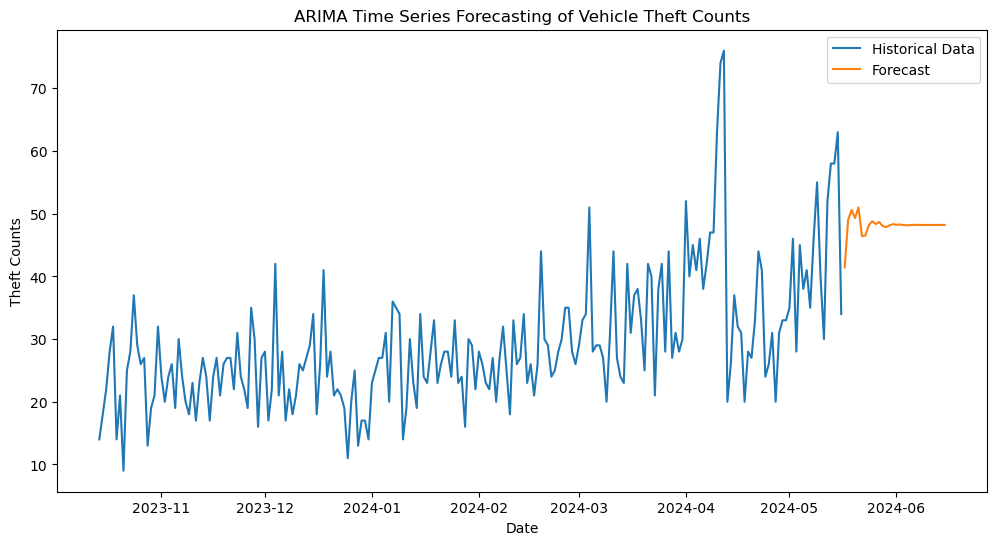

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset and convert 'date_stolen' column to datetime
df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])

# Aggregate data by date
theft_counts_by_date = df5.resample('D', on='date_stolen').size()

# Fit ARIMA model
arima_model = ARIMA(theft_counts_by_date, order=(5,1,0))
arima_result = arima_model.fit()

# Check model summary
print(arima_result.summary())

# Forecast future theft counts
forecast_steps = 30  # Forecast for 90 days (next 3 months)
forecast = arima_result.forecast(steps=forecast_steps)

# Check forecasted values
print("Forecasted Values:", forecast)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(theft_counts_by_date, label='Historical Data')
plt.plot(pd.date_range(start=theft_counts_by_date.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast')
plt.title('ARIMA Time Series Forecasting of Vehicle Theft Counts')
plt.xlabel('Date')
plt.ylabel('Theft Counts')
plt.legend()
plt.show()


In [17]:
#Option 3: Exponential Smoothing model

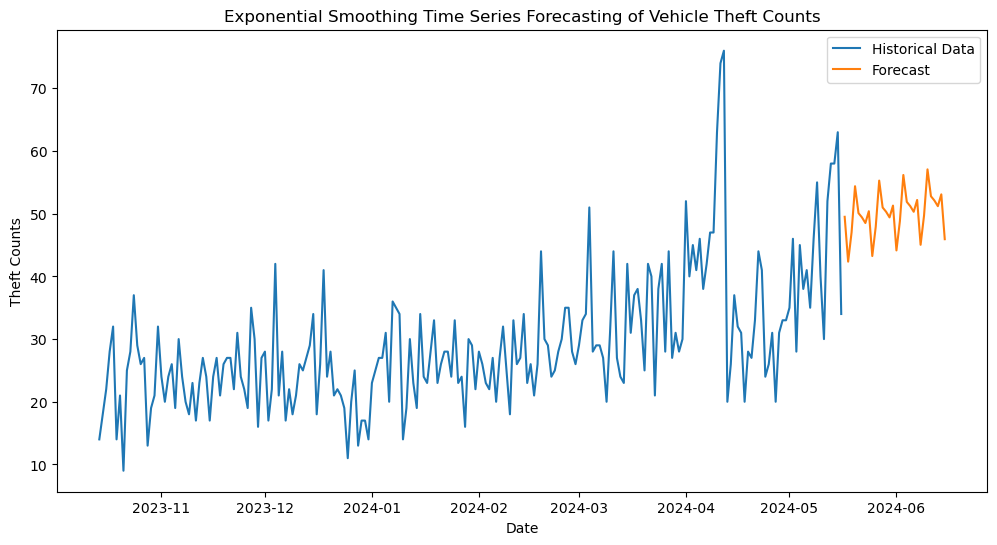

Forecasted Values: 2024-05-17    49.506308
2024-05-18    42.352541
2024-05-19    47.030248
2024-05-20    54.385157
2024-05-21    50.095509
2024-05-22    49.417654
2024-05-23    48.514185
2024-05-24    50.402025
2024-05-25    43.248258
2024-05-26    47.925964
2024-05-27    55.280874
2024-05-28    50.991226
2024-05-29    50.313371
2024-05-30    49.409902
2024-05-31    51.297742
2024-06-01    44.143974
2024-06-02    48.821681
2024-06-03    56.176591
2024-06-04    51.886943
2024-06-05    51.209088
2024-06-06    50.305619
2024-06-07    52.193459
2024-06-08    45.039691
2024-06-09    49.717398
2024-06-10    57.072308
2024-06-11    52.782660
2024-06-12    52.104805
2024-06-13    51.201336
2024-06-14    53.089176
2024-06-15    45.935408
Freq: D, dtype: float64
Ljung-Box Test:
Statistics: 1     2.961677
2     3.228492
3     4.958361
4     6.162072
5     6.171330
6     6.605883
7     7.965281
8     9.575324
9     9.581401
10    9.826205
Name: lb_stat, dtype: float64
P-values: 1     0.085259
2   

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset and convert 'date_stolen' column to datetime
df5['date_stolen'] = pd.to_datetime(df5['date_stolen'])

# Aggregate data by date
theft_counts_by_date = df5.resample('D', on='date_stolen').size()

# Fit Exponential Smoothing model
exp_smooth_model = ExponentialSmoothing(
    theft_counts_by_date, 
    seasonal='add', 
    seasonal_periods=7, 
    trend='add'
).fit()

# Get the residuals
residuals = exp_smooth_model.resid

# Forecast future theft counts
forecast_steps = 30  # Forecast for 30 days (next month)
forecast = exp_smooth_model.forecast(steps=forecast_steps)

# Visual Inspection of Forecasts
plt.figure(figsize=(12, 6))
plt.plot(theft_counts_by_date, label='Historical Data')
plt.plot(pd.date_range(start=theft_counts_by_date.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast')
plt.title('Exponential Smoothing Time Series Forecasting of Vehicle Theft Counts')
plt.xlabel('Date')
plt.ylabel('Theft Counts')
plt.legend()
plt.show()

# Forecasted Values
print("Forecasted Values:", forecast)

# Ljung-Box Test (optional)
max_lag = 10  # Define the maximum lag
lb_test = acorr_ljungbox(residuals, lags=max_lag)
lb_stat = lb_test.lb_stat
lb_pvalue = lb_test.lb_pvalue
print('Ljung-Box Test:')
print(f'Statistics: {lb_stat}')
print(f'P-values: {lb_pvalue}')

# Forecast Accuracy Metrics
# Since we don't have actual values for the forecasted period, we use in-sample data for accuracy metrics
# This is just for demonstration and should be replaced with actual out-of-sample values if available
train_size = len(theft_counts_by_date) - forecast_steps
train_data = theft_counts_by_date[:train_size]
test_data = theft_counts_by_date[train_size:]

# Fit the model on training data
exp_smooth_model_train = ExponentialSmoothing(
    train_data, 
    seasonal='add', 
    seasonal_periods=7, 
    trend='add'
).fit()

# Forecast for the test period
in_sample_forecast = exp_smooth_model_train.forecast(steps=forecast_steps)
forecast_values = in_sample_forecast

# Calculate accuracy metrics
mae = mean_absolute_error(test_data, forecast_values)
mse = mean_squared_error(test_data, forecast_values)
rmse = np.sqrt(mse)

print('\nForecast Accuracy Metrics:')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
